# All Imports

In [1]:
import pycaret
from pycaret.datasets import get_data
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

# Get the data

### The available datasets to chooise one from

In [2]:
available_datasets = get_data()
print(available_datasets)

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


                             Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         t

### Store the dataset in a variable

In [3]:
regression_dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


# Setup

### Initialise the class for the Object Oriented API

In [4]:
regression_exp = RegressionExperiment()
type(regression_exp)

pycaret.regression.oop.RegressionExperiment

### Initialize the setup and compare the models

In [5]:
regression_exp.setup(regression_dataset, target = 'Price')
best_model = regression_exp.compare_models()
best_model

,Description,Value
0,Session id,2402
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,725.2181,2294808.8863,1465.4127,0.9777,0.0796,0.0588,0.2670
lightgbm,Light Gradient Boosting Machine,713.4379,2732687.4049,1604.1307,0.9733,0.0762,0.0556,0.2360
rf,Random Forest Regressor,741.0918,2774237.7325,1621.1765,0.9726,0.0809,0.0585,0.2360
gbr,Gradient Boosting Regressor,874.0709,3069249.1856,1736.2989,0.9692,0.0998,0.0750,0.0980
dt,Decision Tree Regressor,969.3106,4673160.7912,2120.8446,0.9529,0.1077,0.0765,0.0410
ridge,Ridge Regression,2406.9783,13949040.6601,3708.2550,0.8613,0.6461,0.2851,0.0440
lasso,Lasso Regression,2405.2109,14017391.8665,3720.5925,0.8602,0.6526,0.2844,0.3760
llar,Lasso Least Angle Regression,2405.2342,14017401.5753,3720.5948,0.8602,0.6525,0.2844,0.0430
br,Bayesian Ridge,2409.0909,14032384.4281,3721.9922,0.8601,0.6488,0.2851,0.0520
lr,Linear Regression,2413.5756,14045539.2172,3725.4910,0.8597,0.6293,0.2858,0.6180


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=2402)

# Analyze and evaluate the best model

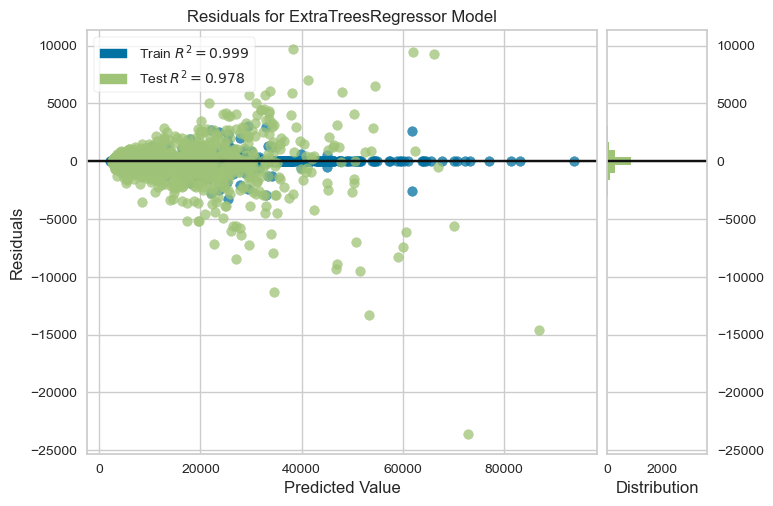

In [6]:
regression_exp.plot_model(best_model, plot = 'residuals')

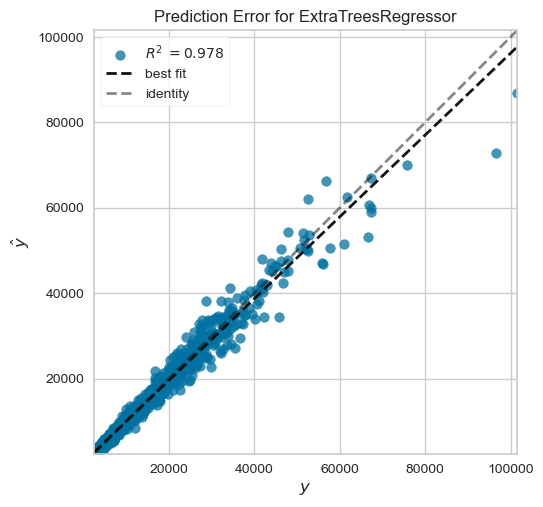

In [7]:
regression_exp.plot_model(best_model, plot = 'error')

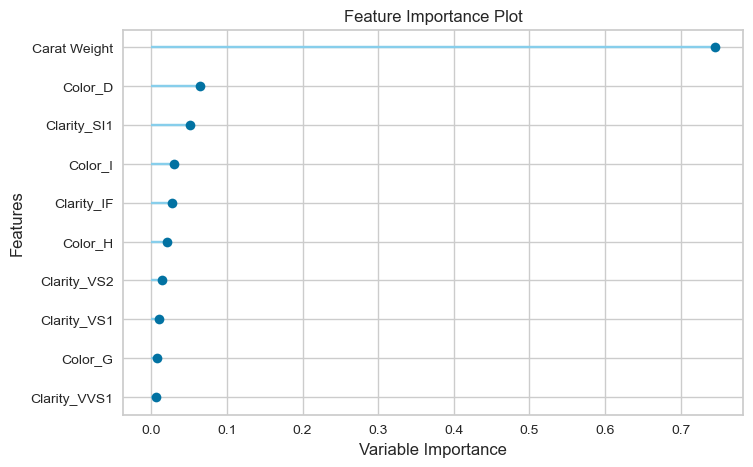

In [8]:
regression_exp.plot_model(best_model, plot = 'feature')

In [9]:
regression_exp.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predict values using the model

In [10]:
holdout_pred = regression_exp.predict_model(best_model)
holdout_pred.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,757.8763,2445456.8225,1563.7956,0.9783,0.0767,0.0570


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
4249,1.60,Ideal,F,SI1,ID,ID,AGSL,13140,12084.870000
500,0.86,Ideal,I,VS1,EX,EX,GIA,3122,3664.040000
1157,2.11,Very Good,G,VS1,VG,VG,GIA,27399,27616.860000
1280,1.01,Very Good,D,SI1,EX,EX,GIA,6270,5891.333333
2114,2.11,Very Good,I,VS2,VG,VG,GIA,16026,17188.130000


In [11]:
new_data = regression_dataset.copy()
new_data.drop('Price', axis=1, inplace=True)
new_data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA


In [12]:
predictions = regression_exp.predict_model(best_model, data = new_data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5306.73
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3451.50
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.00
3,0.91,Ideal,E,SI1,VG,VG,GIA,4327.00
4,0.83,Ideal,G,SI1,EX,EX,GIA,3628.02


# Save the model

In [13]:
regression_exp.save_model(best_model, 'Regression_pycarat_pipeline')
loaded_regression_pipeline = regression_exp.load_model('Regression_pycarat_pipeline')
loaded_regression_pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\Dell\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_enc...
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=2402))])